In [2]:
import pandas
import os
import numpy as np
import shap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataframe=pandas.read_csv('Training_Tutorial.csv')

In [5]:
dataframe

,ABCIndex,AGCGGIndex,AcidicGroupCount,BasicGroupCount,SpAbs,SpMax,SpDiam,SpAD,SpMAD,LogEE,...,TSRW010,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,BOND
0,15.584859,12.370948,0,1,26.535341,2.394303,4.684013,26.535341,1.326767,3.932817,...,67.066251,281.110696,7.597586,895,28,104,121,5.666667,4.472222,-12.69
1,15.584859,12.370948,0,1,26.535341,2.394303,4.684013,26.535341,1.326767,3.932817,...,67.066251,285.085624,8.384871,895,28,104,121,5.666667,4.472222,-10.76
2,15.584859,12.370948,0,1,26.535341,2.394303,4.684013,26.535341,1.326767,3.932817,...,67.066251,301.056074,8.854590,895,28,104,121,5.666667,4.472222,-12.71
3,16.360915,13.103587,0,1,27.676625,2.405886,4.723253,27.676625,1.317935,3.980687,...,68.436034,335.017101,9.853444,1013,31,110,129,6.527778,4.666667,-13.15
4,16.360915,13.268604,0,1,27.660022,2.417166,4.747945,27.660022,1.317144,3.980695,...,68.452270,335.017101,9.853444,989,31,110,129,6.527778,4.666667,-12.77
5,10.675551,9.631085,0,1,18.288157,2.348646,4.626925,18.288157,1.306297,3.567111,...,58.909693,205.079396,7.595533,306,17,70,80,4.444444,3.194444,-10.91
6,15.584859,12.579330,0,1,26.524478,2.397385,4.692382,26.524478,1.326224,3.932822,...,67.074691,301.056074,8.854590,871,28,104,121,5.666667,4.472222,-12.05
7,16.360915,13.315249,0,1,27.666079,2.408368,4.727486,27.666079,1.317432,3.980691,...,68.443668,335.017101,9.853444,987,31,110,129,6.527778,4.666667,-11.93
8,11.382658,9.941843,0,1,19.243684,2.349964,4.609503,19.243684,1.282912,3.629494,...,60.141089,223.069974,8.261851,395,18,74,84,4.694444,3.444444,-9.80


In [6]:
X=dataframe
X=X.drop('BOND',axis=1)
Y=dataframe['BOND']
X_train, X_test, y_train, y_test=train_test_split(X,Y,random_state=0)

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [8]:
parameters={"splitter":["best","random"],
           "max_depth":[1,5,10,15],
           "min_samples_leaf":[1,5,10,15],
            "min_weight_fraction_leaf":[0.1,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,50,70,90]}

In [9]:
from sklearn.model_selection import GridSearchCV


In [10]:
tuning_model=GridSearchCV(regressor, param_grid=parameters, scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.626, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-4.792, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, sp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be s

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_fe

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_lea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-1.526, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-4.878, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=1, max_features=

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-2.138, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-4.878, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.558, total=   0.0s
[CV] max_depth=1, max_fea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-1.526, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.626, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.617, total=   0.0s
[CV] max_de

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_fea

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_feat

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=log2, m

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_f

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, ma

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_feat

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_dep

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.422, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.558, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_fe

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.617, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-2.243, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=1, max_features=

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_feature

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.626, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-1.526, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.626, total=   0.0s
[CV] max_depth=1, max_features=sq

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-4.014, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=1, max_featur

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_f

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_fea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_featur

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=None, m

[CV]  max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_f

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=1, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.558, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=aut

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-1.558, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.422, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.558, total=   0.0s
[CV] max_depth=5, max_fea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_lea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-4.792, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-4.878, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-3.659, total=   0.0s
[CV] max_depth=5, max_features=auto

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_fea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_feat

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_f

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.311, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-2.512, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-4.878, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=5, max_features=

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_fea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_fe

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=log2, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_fe

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=log

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-2.243, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.558, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] m

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-3.659, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.422, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.525, total=   0.0s
[CV] max_depth=5, max_feature

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_feat

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_fea

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_featu

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=sqrt, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_featur

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.525, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.558, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_f

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5,

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_fea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.331, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.756, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.875, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.277, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_feat

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=None, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_f

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=au

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-5.343, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.558, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_feature

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_de

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto,

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.722, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-4.878, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-1.558, total=   0.0s
[CV] max_depth=10, max_featu

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_f

[CV]  max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]


[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.688, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.277, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-4.792, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=log2, max_lea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_fea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.688, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.277, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.722, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.688, total=   0.0s
[CV] max_depth=10, max_fea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, m

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_feat

[CV]  max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_dep

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_dept

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=sqrt, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-0.037, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_feature

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, max_feat

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-1.558, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-2.243, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.525, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-0.037, total=   0.0s
[CV]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None,

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-4.792, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-5.699, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-1.558, total=   0.0s
[CV] max_depth=10, max_featu

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_

[CV]  max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10,

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-1.733, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-5.614, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.277, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.855, total=   0.0s
[CV] max_depth=10,

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=10, max_featu

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.688, total=   0.0s
[CV] max_depth=15, m

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max

[CV]  max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_feature

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_feature

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_de

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_de

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-2.138, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=auto,

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=auto, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, ma

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_dep

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-1.558, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-2.014, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.558, total=   0.0s
[CV] max_depth=15,

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_dept

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=lo

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-1.422, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-1.558, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-2.014, total=   0.0s
[CV] max_depth=15, max_fea

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_feature

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.311, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.855, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-2.243, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, score=-0.319, total=   0.0s
[CV] max_depth=15, max_f

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.331, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.722, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.688, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-0.331, total=   0.0s
[CV] max_depth=15, max

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_f

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-2.534, total=   0.0s
[CV] max_depth=15, max_f

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_dep

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_dept

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=None, 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-0.812, total=   0.0s
[CV] max_depth=15, max_fe

[CV]  max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.422, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-0.319, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, score=-1.558, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-1.421, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.1, splitter=random, score=-0.812, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-3.042, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.5, splitter=best, score=-1.421, total=   0.0s
[CV] max_depth=15

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

[CV]  max_depth=15, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=15, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=15, max_feature

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'ma

In [11]:
best_parameters=tuning_model.best_params_
max_depth_value=best_parameters['max_depth']
max_features_value=best_parameters['max_features']
max_leaf_nodes_value=best_parameters['max_leaf_nodes']
min_samples_leaf_value=best_parameters['min_samples_leaf']
min_weight_fraction_leaf_value=best_parameters['min_weight_fraction_leaf']
splitter_selected=best_parameters['splitter']

In [12]:
tuned_hyper_model=DecisionTreeRegressor(max_depth=max_depth_value,
                                       max_features=max_features_value,
                                       max_leaf_nodes=max_leaf_nodes_value,
                                       min_weight_fraction_leaf=min_weight_fraction_leaf_value,
                                       splitter=splitter_selected)

In [13]:
tuned_hyper_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.1, presort='deprecated',
                      random_state=None, splitter='random')

In [14]:
shap.initjs()

In [15]:
explainer=shap.TreeExplainer(tuned_hyper_model)
shap_values=explainer.shap_values(X)

In [16]:
i=4
shap.force_plot(explainer.expected_value,shap_values[i],features=X.iloc[i],feature_names=X.columns)

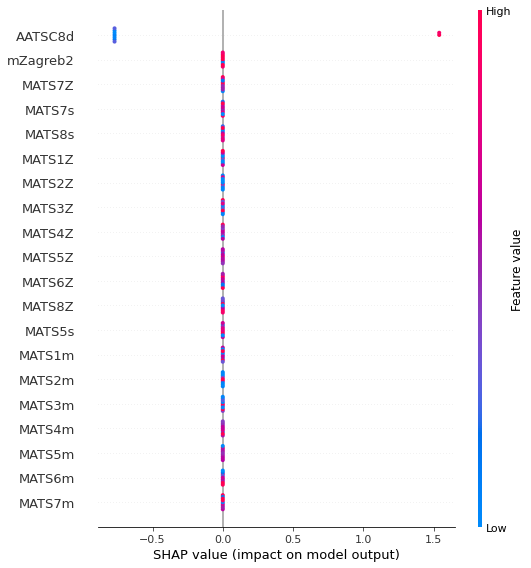

In [61]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns,show=False)
#img=shap.summary_plot(shap_values, features=X, feature_names=X.columns)
#plt.savefig('DecisionTreeSummaryPlot.png')
plt.savefig('DecisionTreeSummaryPlot.png',format = "png",dpi = 150,bbox_inches = 'tight')

In [50]:
img

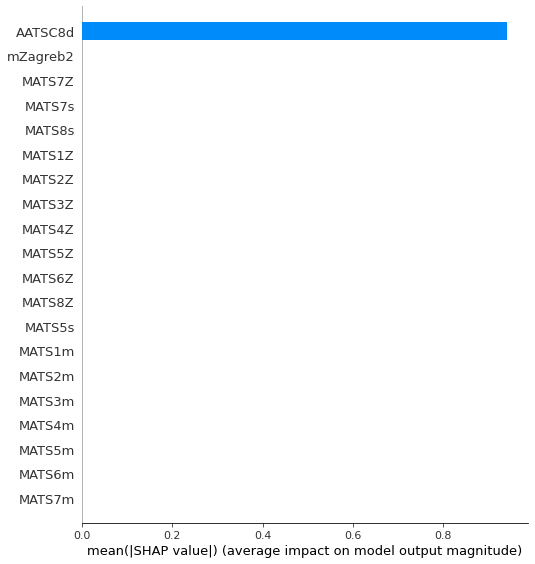

In [62]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns,plot_type='bar',show=False)
plt.savefig('DecisionTreeSummaryBoxPlot.png',format = "png",dpi = 150,bbox_inches = 'tight')